## Multiple Linear Regression 

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd

# for plotting purpose
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For splitting the data into train and test
from sklearn.model_selection import train_test_split

# For reskaling purpose
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Car price file
carprice = pd.read_csv('../input/CarPrice_Assignment.csv')

# Lets look into car price data 
print(carprice.shape)
carprice.info()
carprice.head(2)

# Total 205 rows & 26 columns present in dataset. 
# Fortunately there are No null values.

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [3]:
# Lets check basic statistics of dataset

carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Cleaning

In [4]:
# Lets prepare data for further analysis
# Need to pick only name of Car from CarName column of the dataset
# Lets look first unique values of CarName

carprice.CarName.unique()

# We could notice that '-' present with few car names.
# lets get rid of '-' and change it to space so that we could pick first word from CarName column and use space as dilimiter.
# There are few car names which are written incorrectly & VW in short form of volkswagen.



array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [5]:
# Get rid of '-' from CarName column. We will same column name for further analysis.

carprice["CarName"] = carprice["CarName"].str.replace('-', ' ')

# correct few incorrect names of Cars
carprice["CarName"] = carprice["CarName"].str.replace('maxda', 'mazda')
carprice["CarName"] = carprice["CarName"].str.replace('Nissan', 'nissan')
carprice["CarName"] = carprice["CarName"].str.replace('porcshce', 'porsche')
carprice["CarName"] = carprice["CarName"].str.replace('toyouta', 'toyota')
carprice["CarName"] = carprice["CarName"].str.replace('vw', 'volkswagen')
carprice["CarName"] = carprice["CarName"].str.replace('vokswagen', 'volkswagen')

# Lets pick only first word from carName column
carprice["CarCompanyName"] = carprice["CarName"].str.split().str[0]

# Lets look for unique columns
carprice.CarCompanyName.unique()
# Looks good now.

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [6]:
# Find Duplicates rows if any

carprice.loc[carprice.duplicated()]

# There are no duplicate rows as no rows were printed in output.

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.


#### Let's make a pairplot of all the numeric variables.

In [7]:
# plot a pair plot

#sns.pairplot(carprice)
#plt.show()


### Observations from Pair Plot:

- There are categorical variables but numeric so those also have presence in pair plot.
- price has positive correaltion with -
- carlength, carwidth, curbweight, enginesize, boreratio, horsepower,wheelbase
- carheight shows not much correlation with price
- citympg, highwaympg - seem to have a significant negative correlation with price.

- We can conclude that linear regression can be applied on this data set.

#### Visualising Categorical Variables
- As you might have noticed, there are a few categorical variables as well. 
- Let's make a boxplot for some of these variables.


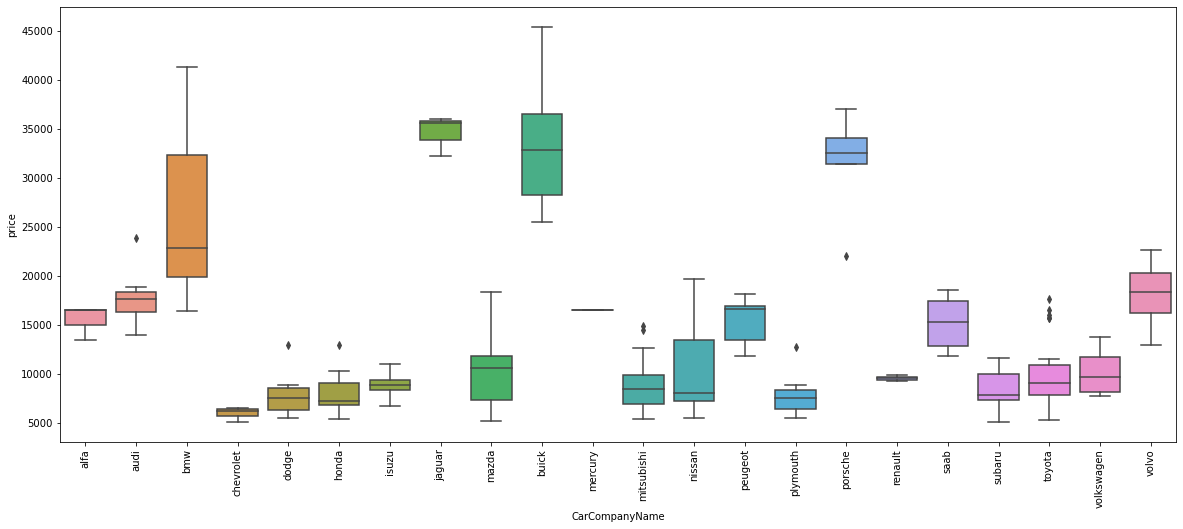

In [8]:
# Carname vs price

plt.figure(figsize=(20, 8))
sns.boxplot(x = 'CarCompanyName', y = 'price', data = carprice)
plt.xticks(rotation = 90)
plt.show()

# Jaguar,Buick,Porsche have highest average price in all cars.

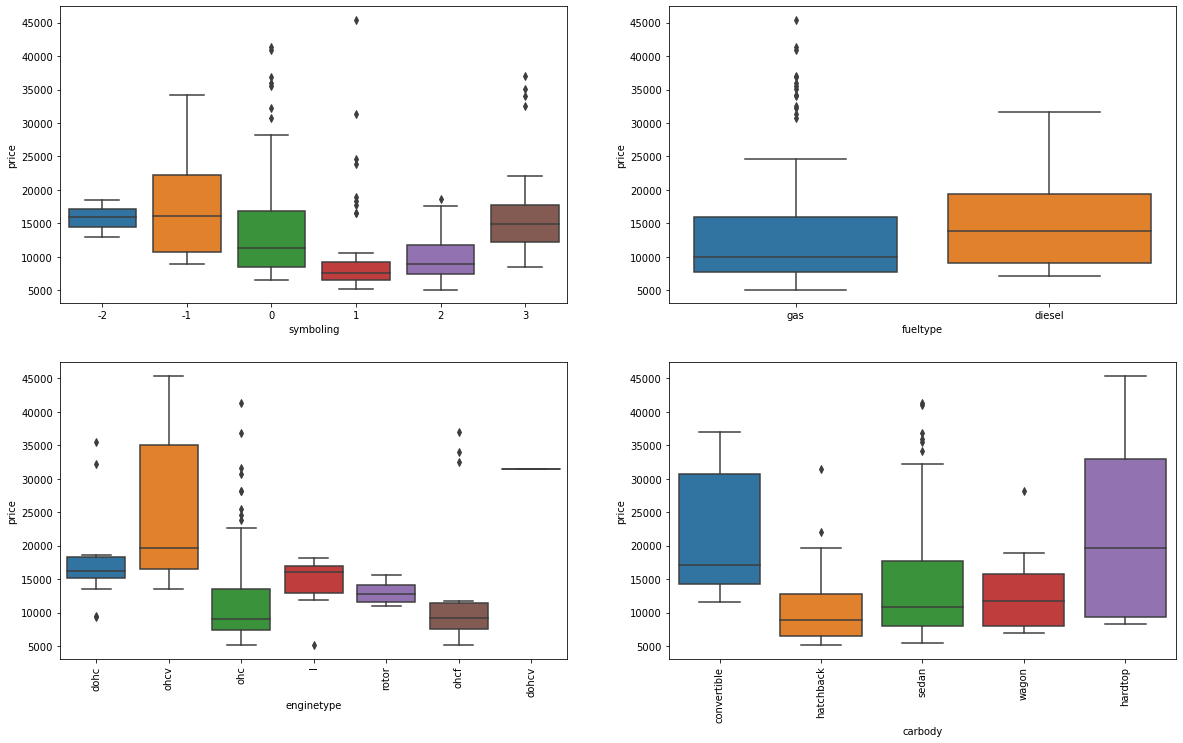

In [9]:
# Lets look some more variables aganist Price

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(2,2,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(2,2,3)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.xticks(rotation = 90)
plt.subplot(2,2,4)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.xticks(rotation = 90)
plt.show()

#### Observations:
- Diesel cars have more average price than Gas fuel type
- hardtop and convertible have higher average price than others.
- Avearge prices of symboling -1 & 0 are high.
- Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
- ohc Engine type seems to be most favored type.

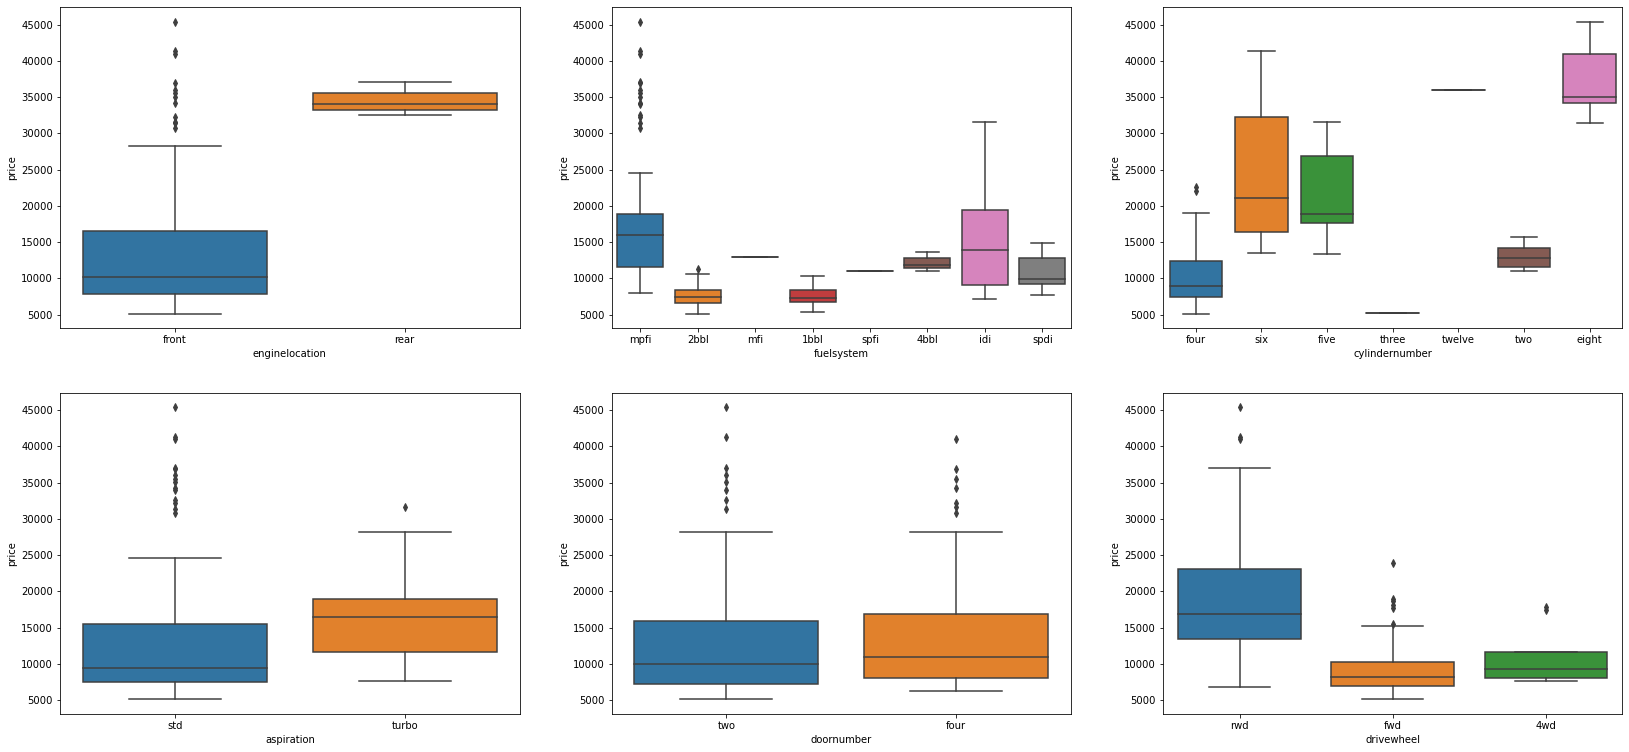

In [10]:
# Lets look for rest of the categorical variables

plt.figure(figsize=(28, 13))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(2,3,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.subplot(2,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(2,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(2,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.show()

#### Observations: 
- doornumber doesn't show much impact. No sugnificant difference between the categories in it.
- turbo have higher price range than the std.
- enginelocation at rear seems to have price but data is less.
- mpfi and idi having the highest price range. 
- Most high price cars seems to prefer rwd drivewheel
- it seems high priced cars have more cylinders. 

In [11]:
# Lets drop few columns which have no significance in our analysis. column Car_ID
carprice.drop(['car_ID'], inplace = True, axis =1)

# Lets drop CarName as well. We ahve already picked car company name from it & now this column has no use.
carprice.drop(['CarName'], inplace = True, axis =1)


## Data Preparation
- Creating Dummy variables and Transforming Categorical variables
- Could see that dataset has many columns with only two types of values
- But in order to fit a regression line, we would need numerical values and not string. 
- Hence, we need to convert them to 1s and 0s


In [12]:
# Applying the map function to the fueltype
carprice['fueltype'] = carprice['fueltype'].map({'gas': 1, 'diesel': 0})
# Applying the map function to the aspiration
carprice['aspiration'] = carprice['aspiration'].map({'std': 1, 'turbo': 0})
# Applying the map function to the doornumber
carprice['doornumber'] = carprice['doornumber'].map({'two': 1, 'four': 0})
# Applying the map function to the enginelocation
carprice['enginelocation'] = carprice['enginelocation'].map({"front": 1, "rear": 0})

In [13]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,1,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa
3,2,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [14]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'body_dummy'
body_dummy = pd.get_dummies(carprice['carbody'])
body_dummy.head(5) 

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


- Now, we don't need five columns. 
- You can drop the convertible column, as the type of carbody can be identified with just the last four columns where —

- 0000 will correspond to convertible
- 0100 will correspond to hatchback
- 0010 will correspond to sedan
- 0010 will correspond to wagon


In [15]:
# Let's drop the first column from status df using 'drop_first = True'
body_dummy = pd.get_dummies(carprice['carbody'],drop_first=True)

# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, body_dummy], axis = 1)
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,hardtop,hatchback,sedan,wagon
0,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,111,5000,21,27,13495.0,alfa,0,0,0,0
1,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,111,5000,21,27,16500.0,alfa,0,0,0,0
2,1,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,154,5000,19,26,16500.0,alfa,0,1,0,0
3,2,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,102,5500,24,30,13950.0,audi,0,0,1,0
4,2,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,115,5500,18,22,17450.0,audi,0,0,1,0


In [16]:
# Drop 'carbody' as we have created the dummies for it
carprice.drop(['carbody'], axis = 1, inplace = True)
carprice.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,hardtop,hatchback,sedan,wagon
0,3,1,1,1,rwd,1,88.6,168.8,64.1,48.8,...,111,5000,21,27,13495.0,alfa,0,0,0,0
1,3,1,1,1,rwd,1,88.6,168.8,64.1,48.8,...,111,5000,21,27,16500.0,alfa,0,0,0,0
2,1,1,1,1,rwd,1,94.5,171.2,65.5,52.4,...,154,5000,19,26,16500.0,alfa,0,1,0,0
3,2,1,1,0,fwd,1,99.8,176.6,66.2,54.3,...,102,5500,24,30,13950.0,audi,0,0,1,0
4,2,1,1,0,4wd,1,99.4,176.6,66.4,54.3,...,115,5500,18,22,17450.0,audi,0,0,1,0


In [17]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'wheel_dummy'
wheel_dummy = pd.get_dummies(carprice['drivewheel'])
wheel_dummy.head(5) 

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


- Now, we don't need 3 columns. 
- You can drop the 4wd column, as the type of drivewheel can be identified with just the last 2 columns where —

- 00 will correspond to 4wd
- 01 will correspond to rwd
- 10 will correspond to fwd

#### Now we will do similar process on other variables.

In [18]:
# Let's drop the first column from status df using 'drop_first = True'
wheel_dummy = pd.get_dummies(carprice['drivewheel'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, wheel_dummy], axis = 1)
carprice.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,citympg,highwaympg,price,CarCompanyName,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,1,1,1,rwd,1,88.6,168.8,64.1,48.8,...,21,27,13495.0,alfa,0,0,0,0,0,1
1,3,1,1,1,rwd,1,88.6,168.8,64.1,48.8,...,21,27,16500.0,alfa,0,0,0,0,0,1
2,1,1,1,1,rwd,1,94.5,171.2,65.5,52.4,...,19,26,16500.0,alfa,0,1,0,0,0,1
3,2,1,1,0,fwd,1,99.8,176.6,66.2,54.3,...,24,30,13950.0,audi,0,0,1,0,1,0
4,2,1,1,0,4wd,1,99.4,176.6,66.4,54.3,...,18,22,17450.0,audi,0,0,1,0,0,0


In [19]:
# Drop 'carbody' as we have created the dummies for it
carprice.drop(['drivewheel'], axis = 1, inplace = True)
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,citympg,highwaympg,price,CarCompanyName,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,21,27,13495.0,alfa,0,0,0,0,0,1
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,21,27,16500.0,alfa,0,0,0,0,0,1
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,19,26,16500.0,alfa,0,1,0,0,0,1
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,24,30,13950.0,audi,0,0,1,0,1,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,18,22,17450.0,audi,0,0,1,0,0,0


In [20]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'enginetype_dummy'
enginetype_dummy = pd.get_dummies(carprice['enginetype'])
enginetype_dummy.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [21]:
# Let's drop the first column from enginetype_dummy df using 'drop_first = True'
enginetype_dummy = pd.get_dummies(carprice['enginetype'],drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, enginetype_dummy], axis = 1)
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,1,0,1,0,0,0,1,0,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,1,0,0,0


In [22]:
# Drop 'enginetype' as we have created the dummies for it
carprice.drop(['enginetype'], axis = 1, inplace = True)

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
carprice['cylindernumber'] = le.fit_transform(carprice.cylindernumber.values)

In [24]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'enginetype_dummy'
#cylindernumber_dummy = pd.get_dummies(carprice['cylindernumber'])
#cylindernumber_dummy.head()

In [25]:
# Let's drop the first column from status df using 'drop_first = True'
#cylindernumber_dummy = pd.get_dummies(carprice['cylindernumber'], drop_first = True)
# Add the results to the original carprice dataframe
#carprice = pd.concat([carprice, cylindernumber_dummy], axis = 1)
carprice['cylindernumber'].head(5)

0    2
1    2
2    3
3    2
4    1
Name: cylindernumber, dtype: int64

In [26]:
# Drop 'cylindernumber' as we have created the dummies for it
# carprice.drop(['cylindernumber'], axis = 1, inplace = True)


In [27]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'fuelsystem_dummy'
fuelsystem_dummy = pd.get_dummies(carprice['fuelsystem'])
fuelsystem_dummy.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [28]:
# Let's drop the first column from fuelsystem_dummy df using 'drop_first = True'
fuelsystem_dummy = pd.get_dummies(carprice['fuelsystem'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, fuelsystem_dummy], axis = 1)
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [29]:
# Drop 'fuelsystem' as we have created the dummies for it
carprice.drop(['fuelsystem'], axis = 1, inplace = True)


In [30]:
# Get the dummy variables for the feature 'CarName' and store it in a new variable - 'CarName_dummy'
CarName_dummy = pd.get_dummies(carprice['CarCompanyName'])
CarName_dummy.head()

,alfa,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Let's drop the first column from CarName_dummy df using 'drop_first = True'
CarName_dummy = pd.get_dummies(carprice['CarCompanyName'], drop_first = True)
# Add the results to the original carprice dataframe
carprice = pd.concat([carprice, CarName_dummy], axis = 1)
carprice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Drop 'fuelsystem' as we have created the dummies for it
carprice.drop(['CarCompanyName'], axis = 1, inplace = True)

In [33]:
print(carprice.shape)
carprice.head()

(205, 60)


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


#### Now we have 205 rows and 61 columns.
- Lets proceed further.

### Splitting the Data into Training and Testing Sets
- As we know, the first basic step for regression is performing a train-test split.

In [34]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)


### Rescaling the Features 

As we saw in the demonstration for Simple Linear Regression, scaling doesn't impact our model. It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

We will use MinMax scaling.

In [35]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the binary and 'dummy' variables
num_vars = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio','stroke', 'compressionratio', 'horsepower',
'peakrpm', 'citympg', 'price','carwidth','curbweight','highwaympg','wheelbase','cylindernumber']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,1,1,0,1,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,1,0,0,0,0,0,0,0
125,1.0,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,1,0,0,0,0,0,0
166,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,0,0,0
199,0.2,1,0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.909091,0.818182,0.440559,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [37]:
y_train = df_train.pop('price')
X_train = df_train

### Building our model
- We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
- Recursive feature elimination

In [38]:
# Running RFE with the output number of the variable equal to 20

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)                          # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 44),
 ('fueltype', False, 2),
 ('aspiration', False, 20),
 ('doornumber', False, 40),
 ('enginelocation', True, 1),
 ('wheelbase', False, 21),
 ('carlength', False, 22),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 3),
 ('stroke', False, 31),
 ('compressionratio', False, 5),
 ('horsepower', False, 15),
 ('peakrpm', True, 1),
 ('citympg', False, 32),
 ('highwaympg', False, 18),
 ('hardtop', False, 25),
 ('hatchback', False, 24),
 ('sedan', False, 26),
 ('wagon', False, 27),
 ('fwd', False, 45),
 ('rwd', False, 37),
 ('dohcv', False, 35),
 ('l', True, 1),
 ('ohc', False, 28),
 ('ohcf', True, 1),
 ('ohcv', False, 38),
 ('rotor', True, 1),
 ('2bbl', False, 39),
 ('4bbl', False, 17),
 ('idi', False, 4),
 ('mfi', False, 41),
 ('mpfi', False, 36),
 ('spdi', False, 29),
 ('spfi', False, 42),
 ('audi', False, 6),
 ('bmw', True, 1),
 ('buick', False, 30),
 ('chevrolet

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'peakrpm', 'l', 'ohcf', 'rotor', 'bmw',
       'mitsubishi', 'peugeot', 'renault', 'subaru'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'ohc', 'ohcv', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi', 'audi', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'nissan', 'plymouth', 'porsche',
       'saab', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_1 = X_train[col]

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_1)

In [44]:
lm = sm.OLS(y_train,X_train_1).fit()   # Running the linear model

In [45]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     132.9
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           5.09e-69
Time:                        19:03:46   Log-Likelihood:                 213.07
No. Observations:                 143   AIC:                            -396.1
Df Residuals:                     128   BIC:                            -351.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1771      0.043      4.

In [46]:
# Lets drop Buick which has high p value .142
X_train_2 = X_train_1.drop(["peakrpm"], axis = 1)

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_2 = sm.add_constant(X_train_2)
lm = sm.OLS(y_train,X_train_2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           1.53e-69
Time:                        19:03:46   Log-Likelihood:                 211.62
No. Observations:                 143   AIC:                            -395.2
Df Residuals:                     129   BIC:                            -353.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2089      0.039      5.

In [48]:
# Calculate the VIFs for the new model after dropping carname buick
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginelocation,inf
8,ohcf,inf
14,subaru,inf
4,curbweight,11.43
6,enginesize,10.28
12,peugeot,10.05
7,l,9.66
2,carwidth,5.78
9,rotor,4.50
5,cylindernumber,3.68


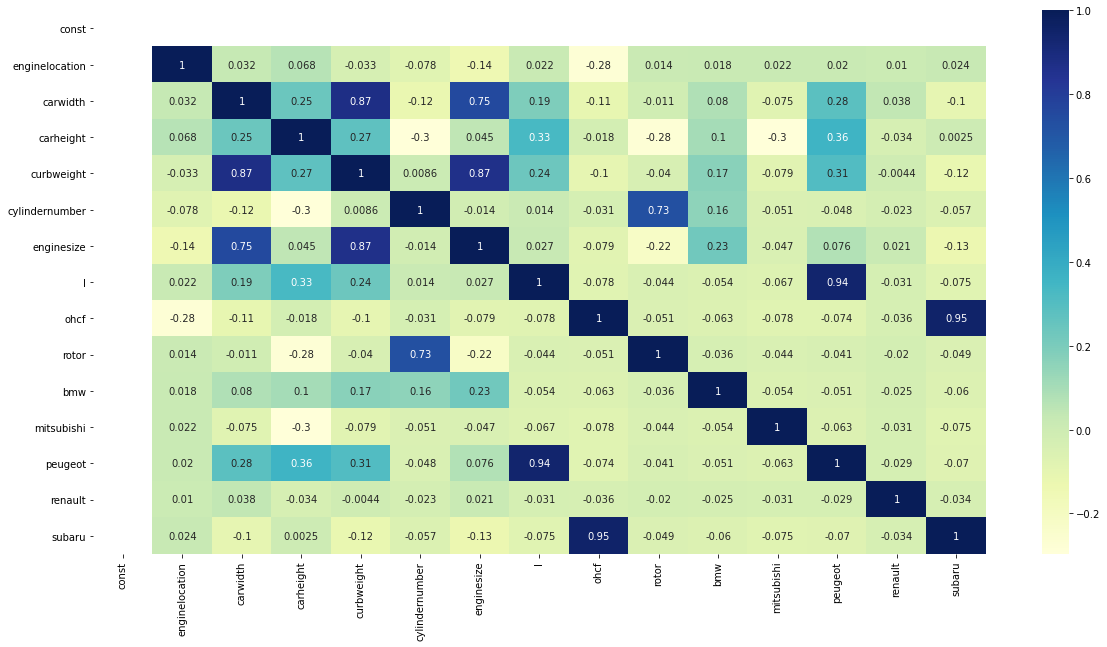

In [49]:
#Correlation using heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(X_train_2.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observations from Heat map:
- Looking into above heatmap and could see enginetype rotor and cylindernumber two are very highly correlated. 
- enginetype l and carname peugeot are very highly correlated. lets drop enginetype l first.

In [50]:
X_train_3 = X_train_2.drop(["enginelocation"], axis = 1)

#### Rebuilding the model without enginetype "l"

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_3 = sm.add_constant(X_train_3)

In [52]:
lm = sm.OLS(y_train,X_train_3).fit()   # Running the linear model

In [53]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           1.53e-69
Time:                        19:03:48   Log-Likelihood:                 211.62
No. Observations:                 143   AIC:                            -395.2
Df Residuals:                     129   BIC:                            -353.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0578      0.032     -1.

In [54]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,43.60
13,subaru,12.35
7,ohcf,12.23
3,curbweight,11.43
5,enginesize,10.28
11,peugeot,10.05
6,l,9.66
1,carwidth,5.78
8,rotor,4.50
4,cylindernumber,3.68


#### Carname Peugeot has high p value and lets drop it.

In [55]:
# boreration is highly correlated with enginesize & carlength. Lets drop it
X_train_4 = X_train_3.drop(["carheight"], axis = 1)

In [56]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_4 = sm.add_constant(X_train_4)
lm = sm.OLS(y_train,X_train_4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           9.06e-69
Time:                        19:03:48   Log-Likelihood:                 206.84
No. Observations:                 143   AIC:                            -387.7
Df Residuals:                     130   BIC:                            -349.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0961      0.030     -3.

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.59
12,subaru,12.27
6,ohcf,12.17
10,peugeot,10.05
5,l,9.65
2,curbweight,9.18
4,enginesize,7.65
1,carwidth,5.74
7,rotor,3.99
3,cylindernumber,3.68


#### Lets drop cylindernumber two due to high vif "inf"

In [58]:
X_train_5 = X_train_4.drop(["mitsubishi"], axis = 1)

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_5 = sm.add_constant(X_train_5)
lm = sm.OLS(y_train,X_train_5).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     148.3
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           2.77e-68
Time:                        19:03:48   Log-Likelihood:                 202.81
No. Observations:                 143   AIC:                            -381.6
Df Residuals:                     131   BIC:                            -346.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1047      0.031     -3.

In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.20
11,subaru,12.27
6,ohcf,12.15
9,peugeot,10.05
5,l,9.64
2,curbweight,9.17
4,enginesize,7.65
1,carwidth,5.74
7,rotor,3.99
3,cylindernumber,3.68


#### Lets drop cylindernumber four due to high vif. Not droping enginesize for now as it reduces r square value significantly.

In [61]:
X_train_6 = X_train_5.drop(["renault"], axis = 1)

In [62]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_6 = sm.add_constant(X_train_6)
lm = sm.OLS(y_train,X_train_6).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           6.66e-68
Time:                        19:03:48   Log-Likelihood:                 199.04
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     132   BIC:                            -343.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1033      0.031     -3.

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.19
10,subaru,12.27
6,ohcf,12.15
9,peugeot,10.05
5,l,9.64
2,curbweight,9.13
4,enginesize,7.65
1,carwidth,5.70
7,rotor,3.99
3,cylindernumber,3.68


#### cylindernumber three has p-value of .058. greater than 0.05 so lets drop it.

In [64]:
X_train_7 = X_train_6.drop(["cylindernumber"], axis = 1)

In [65]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_7 = sm.add_constant(X_train_7)
lm = sm.OLS(y_train,X_train_7).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     157.1
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           2.30e-66
Time:                        19:03:48   Log-Likelihood:                 192.40
No. Observations:                 143   AIC:                            -364.8
Df Residuals:                     133   BIC:                            -335.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2015      0.016    -12.430      0.0

In [66]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,subaru,12.26
5,ohcf,12.15
8,peugeot,9.72
2,curbweight,9.13
4,l,8.95
0,const,8.80
3,enginesize,6.36
1,carwidth,4.52
6,rotor,1.24
7,bmw,1.09


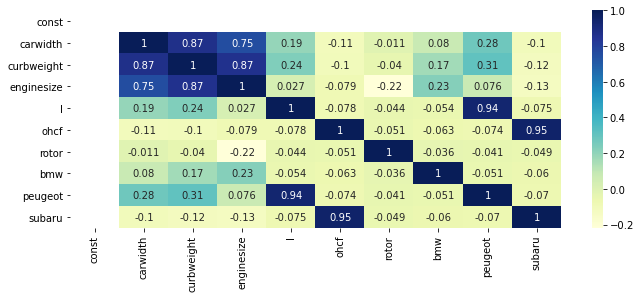

In [67]:
#Correlation using heatmap
plt.figure(figsize = (11, 4))
sns.heatmap(X_train_7.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### boreratio seems to be correlated with carlength and enginesize. Lets drop it.

In [68]:
X_train_8 = X_train_7.drop(["curbweight"], axis = 1)

In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_8 = sm.add_constant(X_train_8)
lm = sm.OLS(y_train,X_train_8).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     153.7
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           1.27e-63
Time:                        19:03:49   Log-Likelihood:                 182.82
No. Observations:                 143   AIC:                            -347.6
Df Residuals:                     134   BIC:                            -321.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2024      0.017    -11.720      0.0

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,subaru,12.14
4,ohcf,12.05
7,peugeot,9.49
3,l,8.95
0,const,8.80
2,enginesize,3.22
1,carwidth,3.16
5,rotor,1.15
6,bmw,1.09


#### stroke has high p value greater than 0.05. lets drop it.

In [71]:
X_train_9 = X_train_8.drop(["l"], axis = 1)

In [72]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_9 = sm.add_constant(X_train_9)
lm = sm.OLS(y_train,X_train_9).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     165.8
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           4.59e-63
Time:                        19:03:49   Log-Likelihood:                 178.66
No. Observations:                 143   AIC:                            -341.3
Df Residuals:                     135   BIC:                            -317.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1906      0.017    -11.087      0.0

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,subaru,12.13
3,ohcf,12.04
0,const,8.29
2,enginesize,3.21
1,carwidth,3.06
6,peugeot,1.16
4,rotor,1.15
5,bmw,1.09


#### cylindernumber is positively correlated with enginesize. lets drop it.

In [74]:
X_train_10 = X_train_9.drop(["peugeot"], axis = 1)

In [75]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_10 = sm.add_constant(X_train_10)
lm = sm.OLS(y_train,X_train_10).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           2.93e-63
Time:                        19:03:49   Log-Likelihood:                 176.30
No. Observations:                 143   AIC:                            -338.6
Df Residuals:                     136   BIC:                            -317.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1832      0.017    -10.743      0.0

In [76]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,subaru,12.07
3,ohcf,12.00
0,const,7.95
2,enginesize,3.03
1,carwidth,2.68
4,rotor,1.13
5,bmw,1.09


In [77]:
X_train_11 = X_train_10.drop(["ohcf"], axis = 1)

In [78]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_11 = sm.add_constant(X_train_11)
lm = sm.OLS(y_train,X_train_11).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           7.16e-58
Time:                        19:03:49   Log-Likelihood:                 160.42
No. Observations:                 143   AIC:                            -308.8
Df Residuals:                     137   BIC:                            -291.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1721      0.019     -9.121      0.0

In [79]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.85
2,enginesize,2.80
1,carwidth,2.53
3,rotor,1.12
4,bmw,1.08
5,subaru,1.02


In [80]:
X_train_12 = X_train_11.drop(["subaru"], axis = 1)

In [81]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_12 = sm.add_constant(X_train_12)
lm = sm.OLS(y_train,X_train_12).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           8.35e-59
Time:                        19:03:49   Log-Likelihood:                 159.78
No. Observations:                 143   AIC:                            -309.6
Df Residuals:                     138   BIC:                            -294.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1760      0.019     -9.486      0.0

In [82]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.58
2,enginesize,2.78
1,carwidth,2.53
3,rotor,1.12
4,bmw,1.08


### Residual Analysis of the train data
##### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [83]:
y_train_price = lm.predict(X_train_12)

Text(0.5, 0, 'Errors')

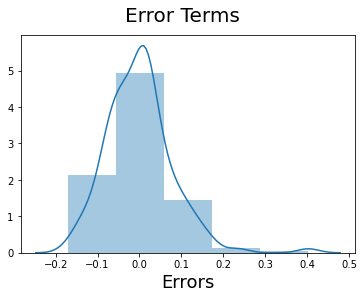

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 5)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions Using the Final Model

- Now that we have fitted the model and checked the normality of error terms,
- it's time to go ahead and make predictions using the final, i.e. 10th model.

#### Applying the scaling on the test sets

In [85]:
# Apply scaler() to all the columns except the binary and 'dummy' variables
num_vars = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio','stroke', 'compressionratio', 'horsepower',
'peakrpm', 'citympg', 'price','carwidth','curbweight','highwaympg','wheelbase','cylindernumber']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [86]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [87]:
y_test = df_test.pop('price')
X_test = df_test

In [88]:
X_train_new = X_train_12.drop(["const"], axis = 1)

In [89]:

vif = pd.DataFrame()
X = X_train_12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.58
2,enginesize,2.78
1,carwidth,2.53
3,rotor,1.12
4,bmw,1.08


In [90]:
# Creating X_test_new dataframe by dropping variables from X_test & picking only columns which were in train model.
X_test_new = X_test[X_train_new.columns]
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carwidth    62 non-null     float64
 1   enginesize  62 non-null     float64
 2   rotor       62 non-null     uint8  
 3   bmw         62 non-null     uint8  
dtypes: float64(2), uint8(2)
memory usage: 1.6 KB


In [91]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [92]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)

Mean_Squared_Error : 0.011177176250734711


In [93]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7908784775730741

Text(0, 0.5, 'y_pred')

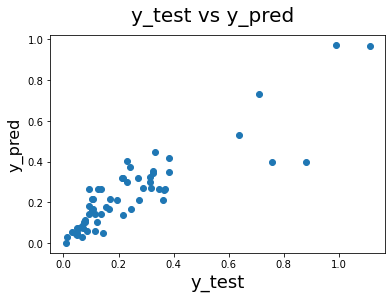

In [94]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'Car Price')

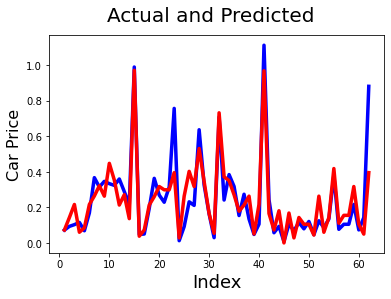

In [95]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

Text(0, 0.5, 'ytest-ypred')

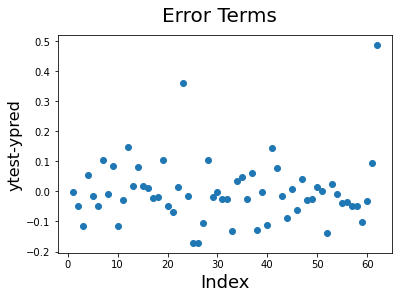

In [96]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
# plt.plot(c,y_test-y_pred_m9, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,y_test-y_pred)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)  

Text(0, 0.5, 'Index')

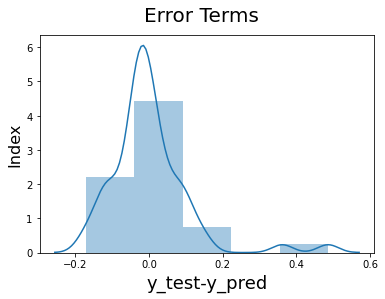

In [97]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=5)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)  